In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('F:/NIIT/DS2_/Mini Projects/Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv')
data.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


# Data exploration

### Data structure

In [3]:
data.shape

(3000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


### Data summary

In [5]:
data.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


### Data distribution

In [6]:
print('Feature'.ljust(20),'dtype'.ljust(10),'nunique'.ljust(10),'isnull')
print('-'*50)
for i in data.columns:
    print(i.ljust(20),str(data[i].dtype).ljust(10),str(data[i].nunique()).ljust(10),data[i].isnull().sum())

Feature              dtype      nunique    isnull
--------------------------------------------------
Id                   int64      3000       0
Area(total)          int64      71         0
Trooms               int64      5          0
Nbedrooms            int64      7          0
Nbwashrooms          int64      8          0
Twashrooms           int64      9          0
roof                 object     2          0
Roof(Area)           int64      52         0
Lawn(Area)           int64      51         0
Nfloors              int64      7          0
API                  int64      61         0
ANB                  int64      6          0
Expected price       int64      1647       0
Grade                object     5          0


**OBSERVATION:**\
no missing values\
Id(unique value for each example) isn't necessary for analysis

In [7]:
df=data.drop('Id',axis=1)

In [8]:
cat,con=[],[]
for i in df.columns:
    if df[i].nunique()<10:
        cat.append(i)
    else: con.append(i)
        
from tabulate import tabulate
print(tabulate({'Categorical':cat,'dtype':df[cat].dtypes},headers=['Categorical','dtype']))
print()
print(tabulate({'Continuous':con,'dtype':df[con].dtypes},headers=['Continuous','dtype']))

Categorical    dtype
-------------  -------
Trooms         int64
Nbedrooms      int64
Nbwashrooms    int64
Twashrooms     int64
roof           object
Nfloors        int64
ANB            int64
Grade          object

Continuous      dtype
--------------  -------
Area(total)     int64
Roof(Area)      int64
Lawn(Area)      int64
API             int64
Expected price  int64


In [9]:
for i in cat:
    print(i)
    print(df[i].value_counts())
    print('-'*40)

Trooms
9    641
6    634
7    586
5    574
8    565
Name: Trooms, dtype: int64
----------------------------------------
Nbedrooms
4    623
5    600
6    573
3    410
7    393
8    226
2    175
Name: Nbedrooms, dtype: int64
----------------------------------------
Nbwashrooms
4    590
5    584
3    550
6    475
7    310
2    288
8    116
1     87
Name: Nbwashrooms, dtype: int64
----------------------------------------
Twashrooms
5     585
6     580
7     532
4     407
8     398
9     208
3     183
10     57
2      50
Name: Twashrooms, dtype: int64
----------------------------------------
roof
YES    1543
NO     1457
Name: roof, dtype: int64
----------------------------------------
Nfloors
3    640
5    592
4    567
6    436
2    395
7    186
1    184
Name: Nfloors, dtype: int64
----------------------------------------
ANB
5    538
2    527
4    513
1    498
3    467
6    457
Name: ANB, dtype: int64
----------------------------------------
Grade
D    1270
C     716
B     539
A     399
E 

### Categorical data: Count plot

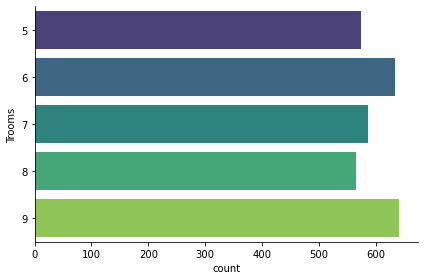

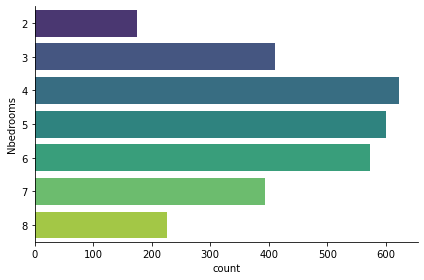

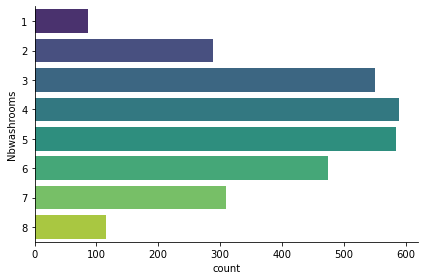

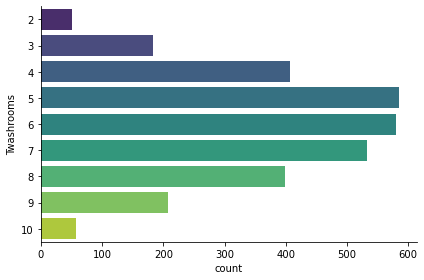

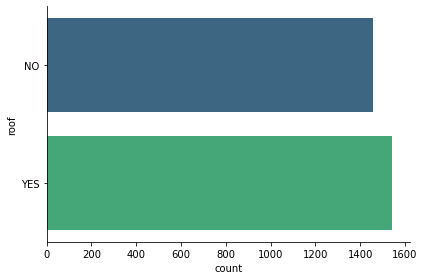

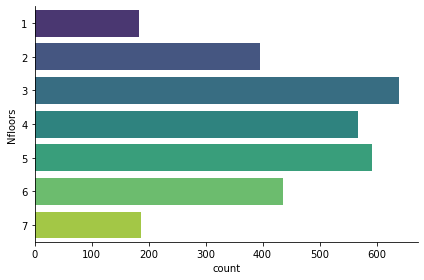

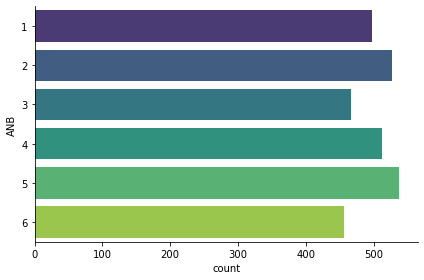

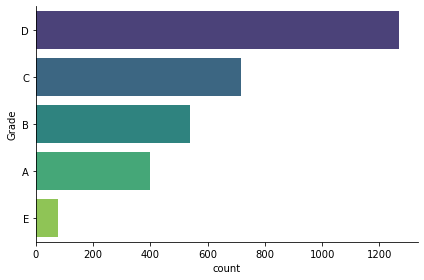

In [10]:
for i in cat:
    sns.catplot(data=df,y=i,kind='count',palette='viridis',height=4,aspect=1.5)

**OBSERVATION:**
1. Trooms in all varieties
2. Many houses with **4-6 Nbedrooms**
3. Many houses with **4-5 Nbwashrooms**
4. Many houses with **4-5 Nbwashrooms**
5. Almost equal number of houses with or without roof
6. Many houses with **3-5 Nfloors**
7. **Grade D** seems more prevelant and **Grade E** has the least data

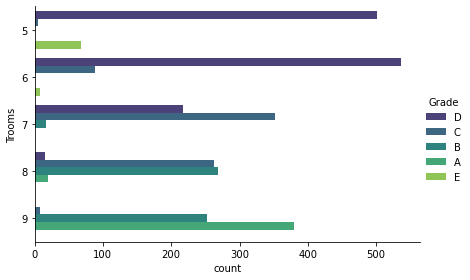

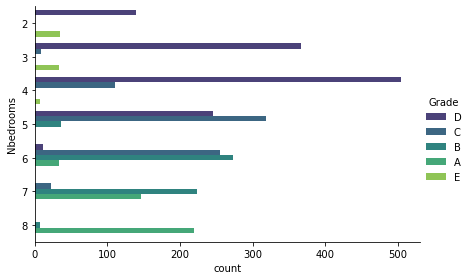

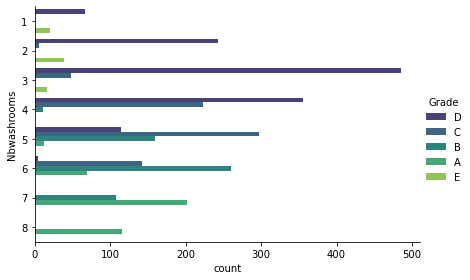

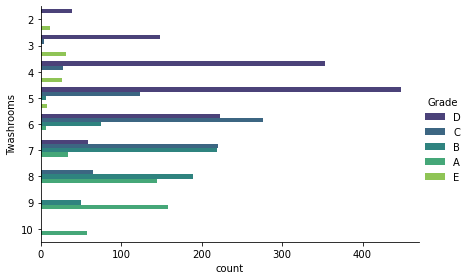

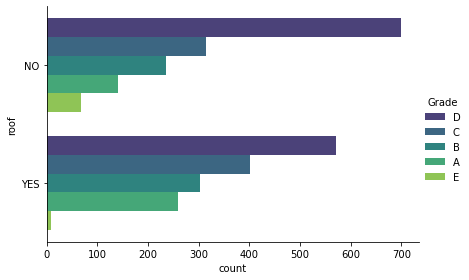

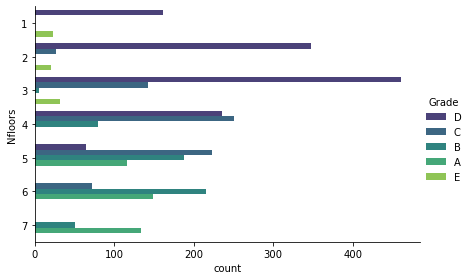

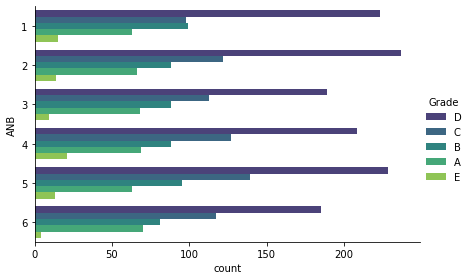

In [11]:
for i in cat[:-1]:
    sns.catplot(data=df,y=i,hue='Grade',kind='count',palette='viridis',height=4,aspect=1.5)

**OBSERVATION:**
1. Grade impoves with the number of Trooms
2. Grade imporves with the number of Nbedrooms
3. Grade imporves with the number of Nbwashrooms
4. Grade imporves with the number of Twashrooms
5. Grade is irrespective of roof
6. Grade imporves with the number of Nfloors
7. ANB is irrespective of Grade

**Grade can be expected to be positively correlated to: Trooms, Nbedrooms, Nbwashrooms, Twashrooms, Nfloors**

### Continuous data: Histogram

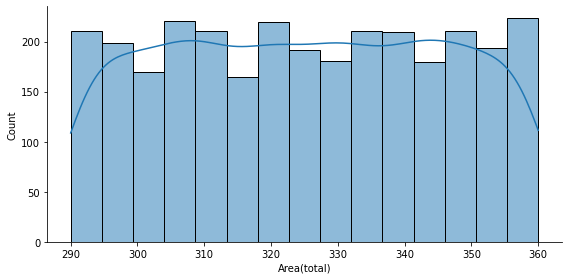

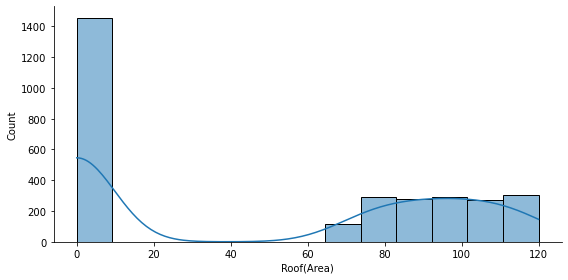

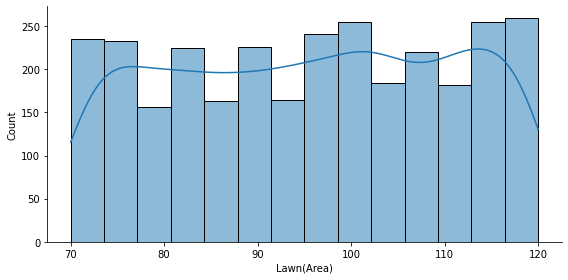

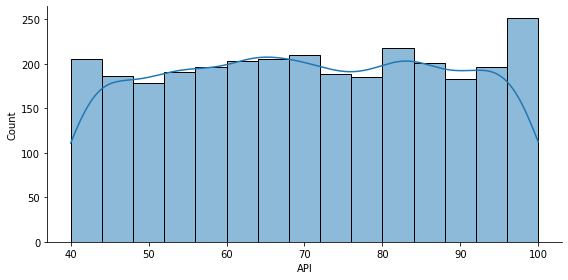

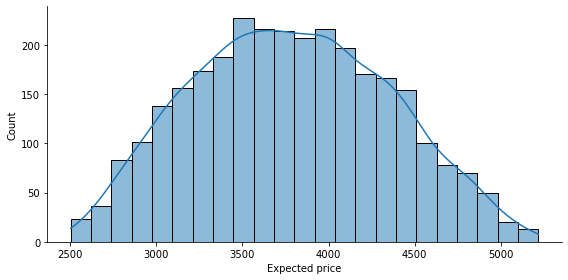

In [12]:
for i in con:
    sns.displot(data=df,x=i,kind='hist',kde=1,palette='viridis',height=4,aspect=2)

**OBSERVATION:**
1. Balanced distribution of houses with Area(total)
2. Roof(Area) is imbalanced
3. Balanced distribution of houses with Lawn (Area)
4. Balanced distribution of houses with API
5. Expected price follows normal distribution   

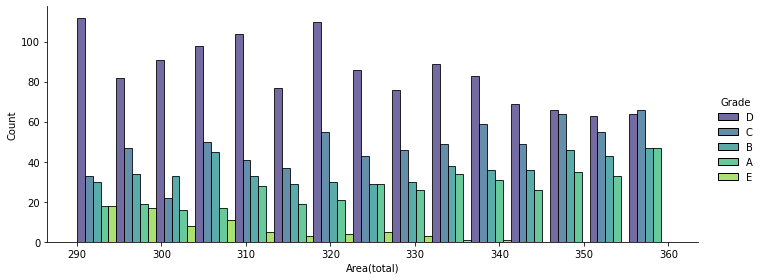

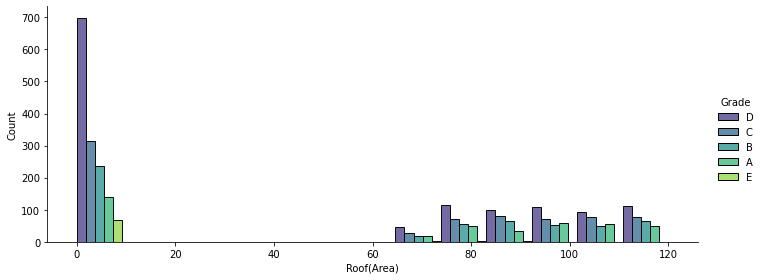

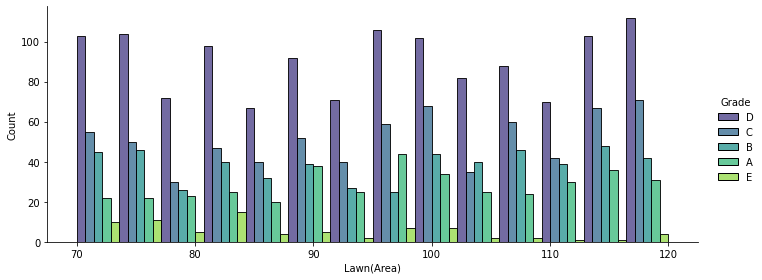

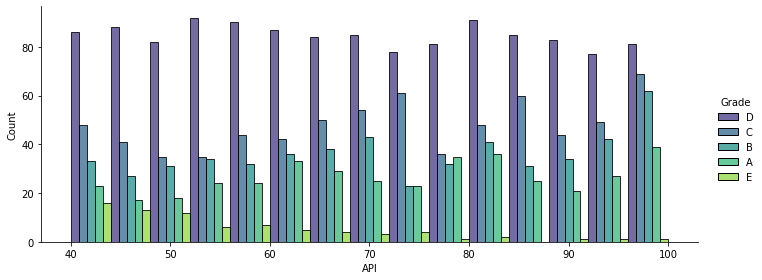

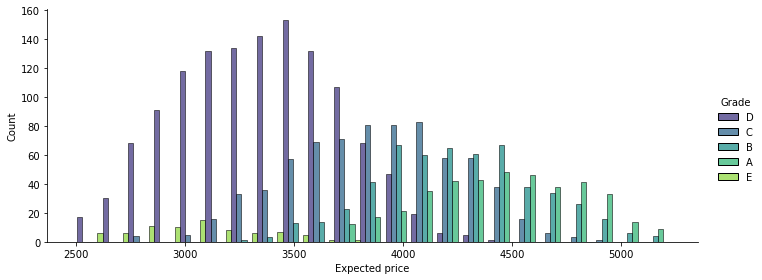

In [13]:
for i in con:
    sns.displot(data=data,x=i,hue='Grade',kind='hist',multiple='dodge',palette='viridis',height=4,aspect=2.5)

**OBSERVATION:**\
The Grade distribution has almost balanced except where Grade D has the most and Grade E has the least with significant difference amongst them.So its important to note the qualitative behaviour of other Grades more keenly to conclude an unbiased decision not dominated by the quatities
1. Area(total) is proportional to grade: greater area higher grade
2. Grade is uneffected by Roof(Area)
3. Grade increses with lawn area 
4. Grade is uneffected by API
5. Expected price is more for higher grades

# Data preprocessing

### Feature engineering

In [14]:
from sklearn import preprocessing

In [15]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=preprocessing.LabelEncoder().fit_transform(df[i])
        
display(df.head())

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,320,7,4,4,5,0,0,75,3,40,1,3843,3


In [16]:
y=df['Grade']
x=df.drop('Grade',axis=1)
print('x:',x.shape)
print('y:',y.shape)

x: (3000, 12)
y: (3000,)


### Feature scaling

MinMaxScaler ranges from 0 to 1, StandardScaler ranges from -1 to +1\
since count is involved positive values don't confuse though even StandardScaler can be used which will give the same result

**shouldn't scale the response variable**, only the explanatory variables should be scaled\
if the response variables are scaled the classes will be interpreted as continuous data and not as categorical data/class by the machine

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
x=pd.DataFrame(MinMaxScaler().fit_transform(x),columns=x.columns)
display(x.head())

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251
1,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944
2,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702
3,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301
4,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732


### Feature selection

In [19]:
df.corr().style.background_gradient(cmap='viridis').set_precision(3)

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Area(total),1.000,0.019,0.031,0.032,0.039,0.014,0.017,-0.002,0.017,-0.000,-0.011,0.275,-0.177
Trooms,0.019,1.000,0.866,0.827,0.795,0.025,0.027,0.010,0.862,0.008,0.007,0.820,-0.875
Nbedrooms,0.031,0.866,1.000,0.957,0.919,0.023,0.025,0.000,0.742,0.003,0.015,0.716,-0.865
Nbwashrooms,0.032,0.827,0.957,1.000,0.960,0.029,0.029,0.007,0.712,0.011,0.008,0.684,-0.847
Twashrooms,0.039,0.795,0.919,0.960,1.000,0.028,0.029,0.008,0.685,0.012,0.016,0.655,-0.819
roof,0.014,0.025,0.023,0.029,0.028,1.000,0.977,-0.005,0.015,-0.008,-0.021,0.008,-0.167
Roof(Area),0.017,0.027,0.025,0.029,0.029,0.977,1.000,-0.007,0.014,-0.006,-0.016,0.009,-0.170
Lawn(Area),-0.002,0.010,0.000,0.007,0.008,-0.005,-0.007,1.000,0.014,0.011,0.026,0.012,-0.051
Nfloors,0.017,0.862,0.742,0.712,0.685,0.015,0.014,0.014,1.000,-0.002,0.021,0.715,-0.788
API,-0.000,0.008,0.003,0.011,0.012,-0.008,-0.006,0.011,-0.002,1.000,-0.026,0.017,-0.099


**Features correlated with the target variable Grade:**\
Trooms > NBedrooms > Nbwashrooms > Twashrooms > Nfloors > Expected price

# Data splitting

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=1,stratify=y)
print('train:',x_train.shape,y_train.shape)
print('test:',x_test.shape,y_test.shape)

train: (2250, 12) (2250,)
test: (750, 12) (750,)


# Modelling

for multi-classification: **KNeighborsClassifier, Naive-bayes, DecisionTreeClassifier, RandomForestClassifier(Bagging), AdaBoost, Stacking**

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [23]:
from sklearn.inspection import permutation_importance

# KNeighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
score=dict()
up=int(np.sqrt(x_train.shape[0]))
for k in range(1,up,2):
    temp_knn=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train) 
    temp_score=temp_knn.score(x_test,y_test)
    score[k]=temp_score
best_k=max(score,key=lambda i:score[i])
print('Best k =',best_k)

Best k = 27


In [26]:
knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train,y_train)
print('KNeighborsClassifier: Taining accuracy:',knn.score(x_train,y_train))

KNeighborsClassifier: Taining accuracy: 0.9062222222222223


In [27]:
y_knn=knn.predict(x_test)
print('KNeighborsClassifier: Testing accuracy:',accuracy_score(y_test,y_knn))

KNeighborsClassifier: Testing accuracy: 0.8813333333333333


Text(33.0, 0.5, 'actual\n')

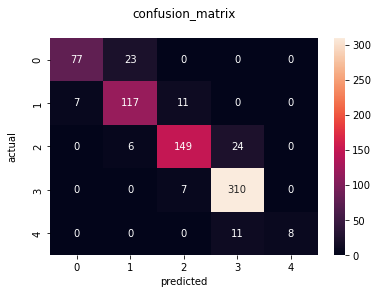

In [28]:
sns.heatmap(confusion_matrix(y_test,y_knn),annot=True,fmt='d')
plt.title('confusion_matrix\n')
plt.xlabel('predicted\n')
plt.ylabel('actual\n')

In [29]:
print('Classification report:\n',classification_report(y_test,y_knn))

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       100
           1       0.80      0.87      0.83       135
           2       0.89      0.83      0.86       179
           3       0.90      0.98      0.94       317
           4       1.00      0.42      0.59        19

    accuracy                           0.88       750
   macro avg       0.90      0.77      0.81       750
weighted avg       0.88      0.88      0.88       750



In [30]:
imp_knn=permutation_importance(knn,x_test,y_knn)
imp_knn=pd.DataFrame({'Feature':x_test.columns,'Importance':imp_knn.importances_mean})
display(imp_knn.sort_values(by='Importance',ascending=False)[:3])

,Feature,Importance
1,Trooms,0.349333
2,Nbedrooms,0.198400
8,Nfloors,0.176533


### Summary report of KNeighborsClassifier:
**Training accuracy:** 0.906\
**Testing accuracy:** 0.881

**Top 3 influential features:**\
    1.Trooms\
    2.Nbedrooms\
    3.Nfloors

# Naive-Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
nb=GaussianNB()
nb.fit(x_train,y_train)
print('GaussianNB: Taining accuracy:',nb.score(x_train,y_train))

GaussianNB: Taining accuracy: 0.8084444444444444


In [33]:
y_nb=nb.predict(x_test)
print('GaussianNB: Testing accuracy:',accuracy_score(y_test,y_nb))

GaussianNB: Testing accuracy: 0.7893333333333333


Text(33.0, 0.5, 'actual\n')

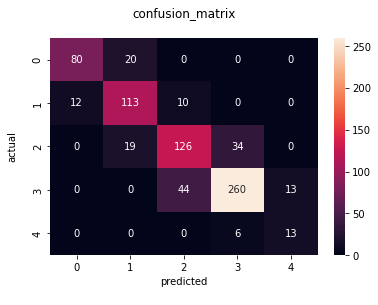

In [34]:
sns.heatmap(confusion_matrix(y_test,y_nb),annot=True,fmt='d')
plt.title('confusion_matrix\n')
plt.xlabel('predicted\n')
plt.ylabel('actual\n')

In [35]:
print('Classification report:\n',classification_report(y_test,y_nb))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       100
           1       0.74      0.84      0.79       135
           2       0.70      0.70      0.70       179
           3       0.87      0.82      0.84       317
           4       0.50      0.68      0.58        19

    accuracy                           0.79       750
   macro avg       0.74      0.77      0.75       750
weighted avg       0.80      0.79      0.79       750



In [36]:
imp_nb=permutation_importance(nb,x_test,y_nb)
imp_nb=pd.DataFrame({'Feature':x_test.columns,'Importance':imp_nb.importances_mean})
display(imp_nb.sort_values(by='Importance',ascending=False)[:3])

,Feature,Importance
1,Trooms,0.340000
2,Nbedrooms,0.276267
3,Nbwashrooms,0.237333


### Summary report of GaussianNB:
**Training accuracy:** 0.808\
**Testing accuracy:** 0.789

**Top 3 influential features:**\
    1.Trooms\
    2.Nbedrooms\
    3.Nbwashrooms

# DecisionTreeClassifier

In [37]:
from sklearn import tree
from sklearn.tree import plot_tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
params={'max_depth':list(range(2,len(x_train.columns)))}
grid_search_dtc=GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),param_grid=params,cv=5,n_jobs=-1)
grid_search_dtc.fit(x_train,y_train)
print(grid_search_dtc.best_estimator_)
print('DecisionTreeClassifier: Training accuracy:',grid_search_dtc.best_estimator_.score(x_train,y_train))

DecisionTreeClassifier(max_depth=8, random_state=1)
DecisionTreeClassifier: Training accuracy: 0.9404444444444444


In [40]:
y_dtc=grid_search_dtc.predict(x_test)
print('DecisionTreeClassifier: Testing accuracy:',accuracy_score(y_test,y_dtc))

DecisionTreeClassifier: Testing accuracy: 0.8253333333333334


Text(0.5, 1.0, 'confusion_matrix')

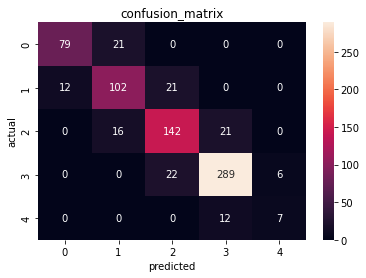

In [41]:
sns.heatmap(confusion_matrix(y_test,y_dtc),annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion_matrix')

In [42]:
print('Classification report:\n',classification_report(y_test,y_dtc))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       100
           1       0.73      0.76      0.74       135
           2       0.77      0.79      0.78       179
           3       0.90      0.91      0.90       317
           4       0.54      0.37      0.44        19

    accuracy                           0.83       750
   macro avg       0.76      0.72      0.74       750
weighted avg       0.82      0.83      0.82       750



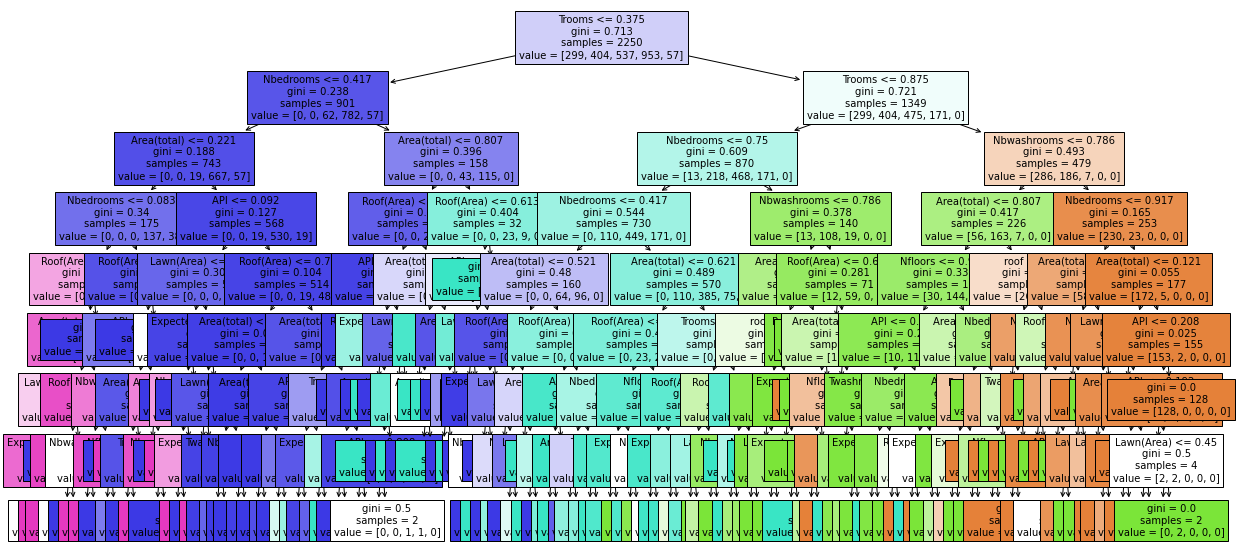

In [43]:
plt.figure(figsize=(20,10))
plot_tree(DecisionTreeClassifier(max_depth=8,random_state=1).fit(x_train,y_train),
         feature_names=x_train.columns,fontsize=10,fillbbed=True);

In [44]:
imp_dtc=permutation_importance(grid_search_dtc,x_test,y_dtc)
imp_dtc=pd.DataFrame({'Feature':x_train.columns,'Importance':imp_dtc.importances_mean})
imp_dtc.sort_values(by='Importance',ascending=False)[:3]

,Feature,Importance
1,Trooms,0.484000
2,Nbedrooms,0.254667
0,Area(total),0.190133


### Summary report of DecisionTreeClassifier:
**Training accuracy:** 0.940\
**Testing accuracy:** 0.825

**Top 3 influential features:**\
    1.Trooms\
    2.Nbwashrooms\
    3.Area(total)

# RandomForestClassifier(Bagging)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
params={'n_estimators':list(range(1,10,2)),'max_depth':list(range(2,len(x_train.columns)))}
grid_search_rfc=GridSearchCV(estimator=RandomForestClassifier(random_state=1),param_grid=params,cv=5,n_jobs=-1)
grid_search_rfc.fit(x_train,y_train)
print(grid_search_rfc.best_estimator_)
print('RandomForestClassifier: Training accuracy:',grid_search_rfc.best_estimator_.score(x_train,y_train))

RandomForestClassifier(max_depth=11, n_estimators=9, random_state=1)
RandomForestClassifier: Training accuracy: 0.9871111111111112


In [47]:
y_rfc=grid_search_rfc.predict(x_test)
print('RandomForestClassifier: Testing accuracy:',accuracy_score(y_test,y_rfc))

RandomForestClassifier: Testing accuracy: 0.856


Text(0.5, 1.0, '\nConfusion matrix\n')

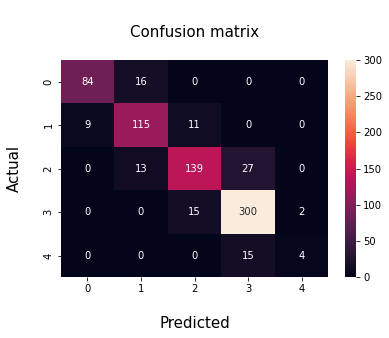

In [48]:
sns.heatmap(confusion_matrix(y_test,y_rfc,),annot=True,fmt='d')
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual\n',fontsize=15)
plt.title('\nConfusion matrix\n',fontsize=15)

In [49]:
print('\nClassification report:')
print(classification_report(y_test,y_rfc))


Classification report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       100
           1       0.80      0.85      0.82       135
           2       0.84      0.78      0.81       179
           3       0.88      0.95      0.91       317
           4       0.67      0.21      0.32        19

    accuracy                           0.86       750
   macro avg       0.82      0.73      0.75       750
weighted avg       0.85      0.86      0.85       750



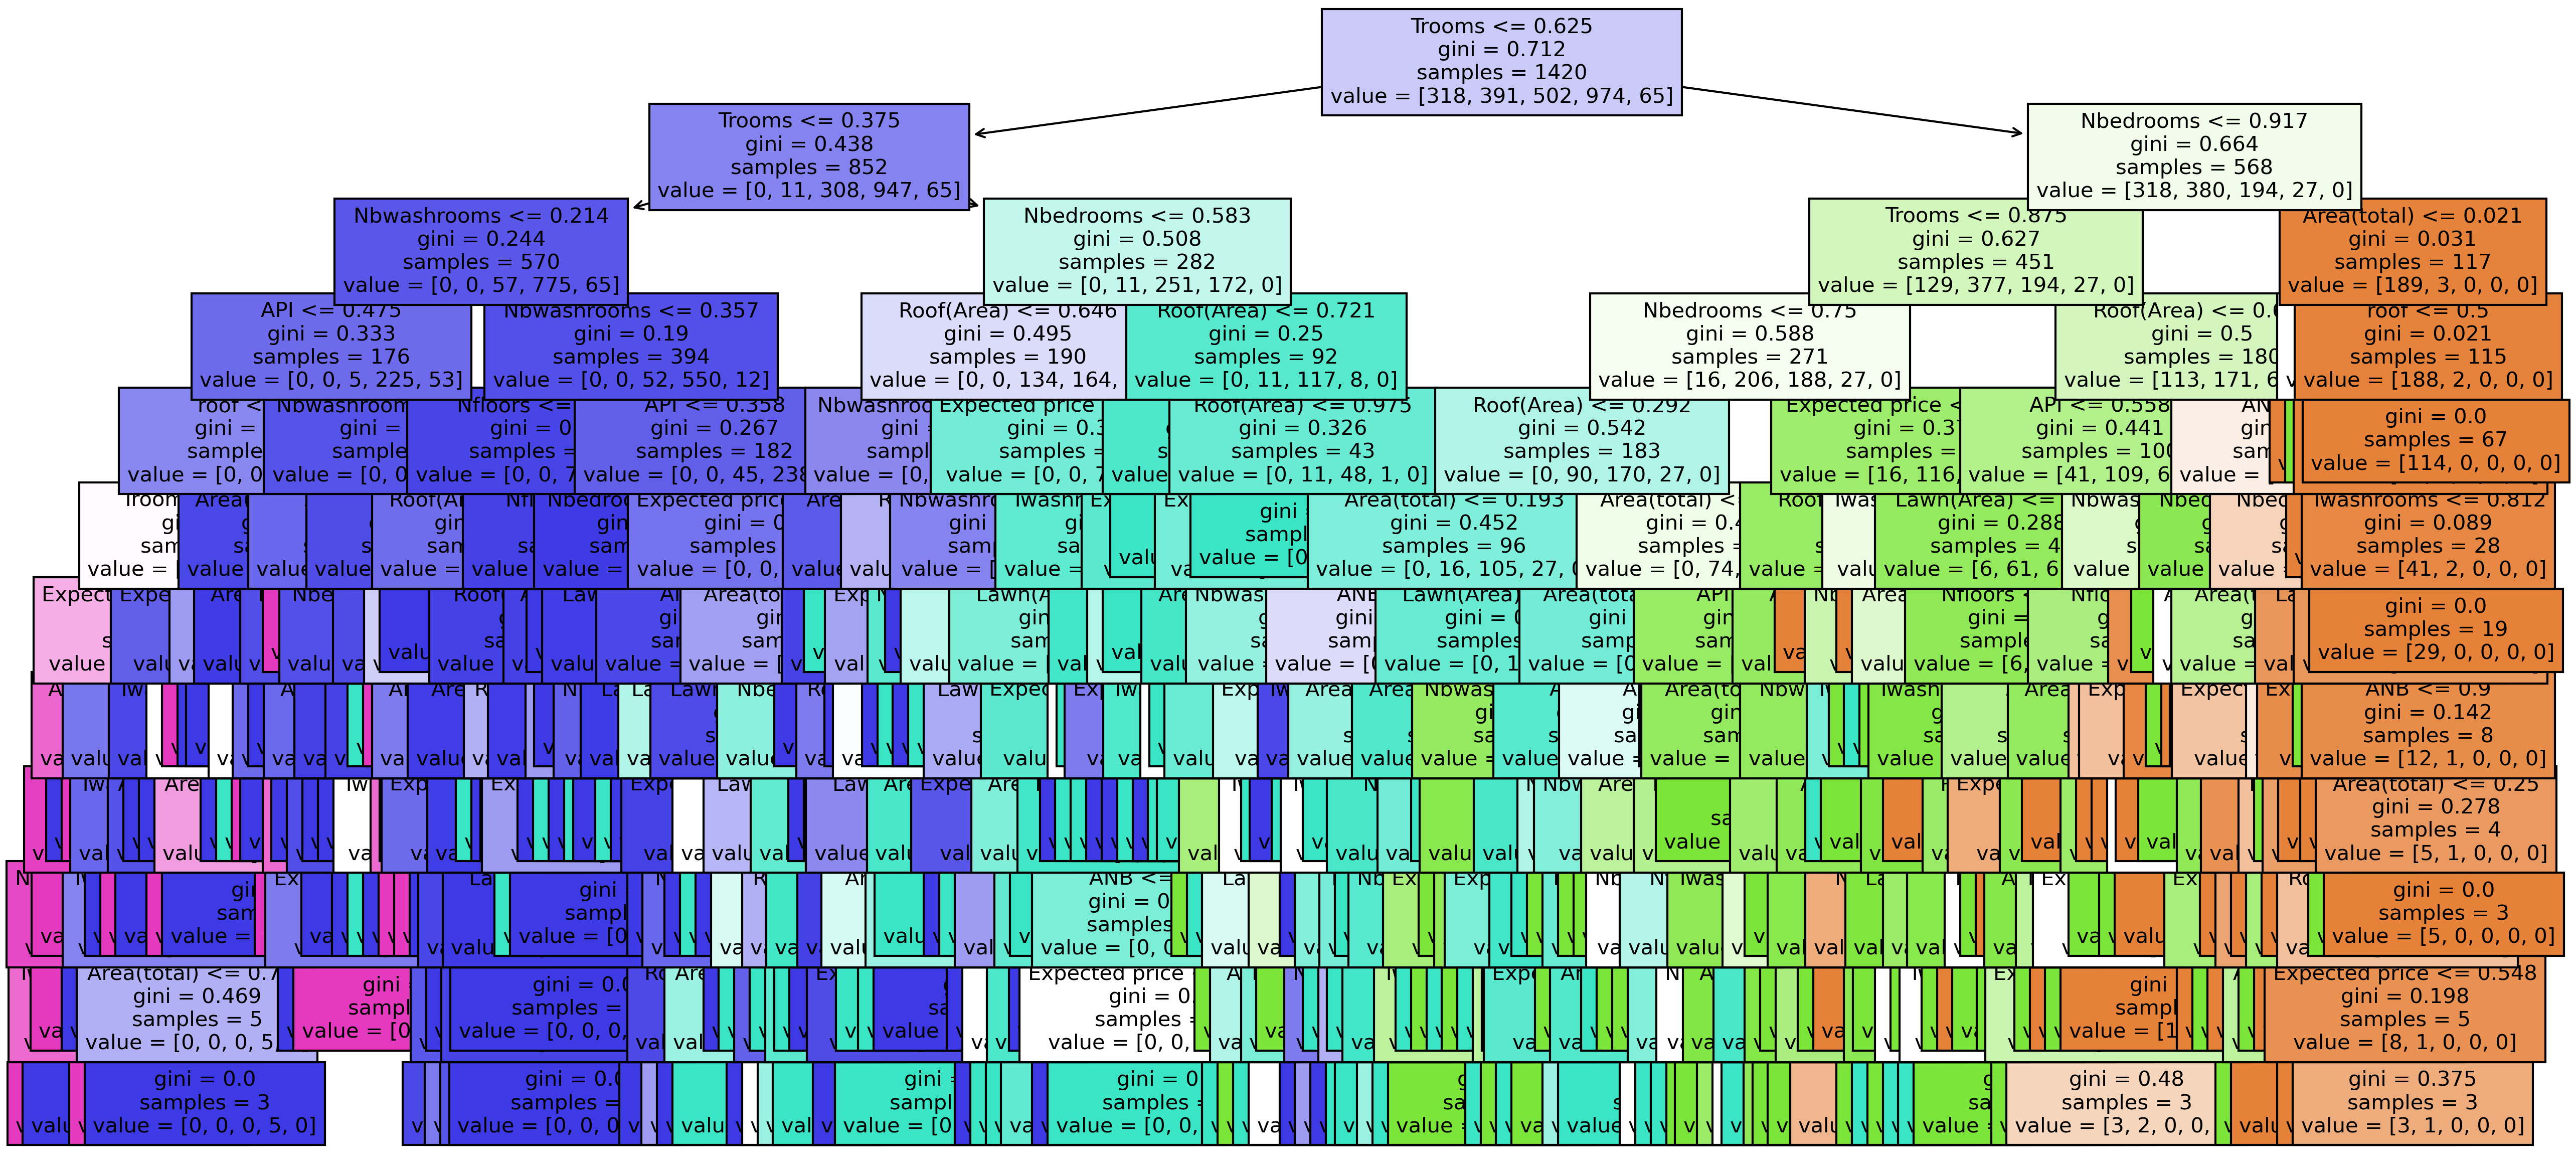

In [50]:
plt.figure(figsize=(20,10),dpi=300)
plot_tree(RandomForestClassifier(max_depth=11,n_estimators=9,random_state=1).fit(x_train,y_train).estimators_[0],
         feature_names=x_train.columns,fontsize=10,filled=True);

In [51]:
imp_rfc=permutation_importance(grid_search_rfc,x_test,y_rfc)
imp_rfc=pd.DataFrame({'Feature':x_test.columns,'Importance':imp_rfc.importances_mean})
display(imp_rfc.sort_values(by='Importance',ascending=False)[:3])

,Feature,Importance
1,Trooms,0.328000
3,Nbwashrooms,0.138133
0,Area(total),0.107467


### Summary report of RandomForestClassifier:
**Training accuracy:** 0.987\
**Testing accuracy:** 0.856

**Top 3 influential features:**\
    1.Trooms\
    2.Nbwashrooms\
    3.Nbedrooms

# AdaBoost

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
ab=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8, random_state=1),
                     random_state=1,n_estimators=9)
ab.fit(x_train,y_train)
print('AdaBoost: Taining accuracy:',ab.score(x_train,y_train))

AdaBoost: Taining accuracy: 0.9995555555555555


In [54]:
y_ab=ab.predict(x_test)
print('AdaBoost: Testing accuracy:',accuracy_score(y_test,y_ab))

AdaBoost: Testing accuracy: 0.8573333333333333


Text(0.5, 1.0, '\nConfusion matrix\n')

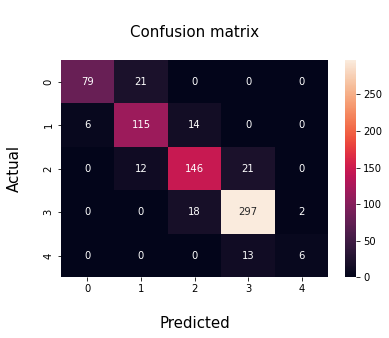

In [55]:
sns.heatmap(confusion_matrix(y_test,y_ab,),annot=True,fmt='d')
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual\n',fontsize=15)
plt.title('\nConfusion matrix\n',fontsize=15)

In [56]:
print('\nClassification report:')
print(classification_report(y_test,y_ab))


Classification report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       100
           1       0.78      0.85      0.81       135
           2       0.82      0.82      0.82       179
           3       0.90      0.94      0.92       317
           4       0.75      0.32      0.44        19

    accuracy                           0.86       750
   macro avg       0.83      0.74      0.77       750
weighted avg       0.86      0.86      0.85       750



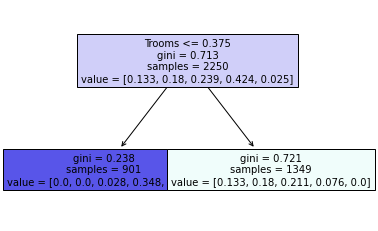

In [57]:
plot_tree(AdaBoostClassifier(random_state=1).fit(x_train,y_train).estimators_[0],
         feature_names=x_train.columns,fontsize=10,filled=True);

In [58]:
imp_ab=permutation_importance(ab,x_test,y_ab)
imp_ab=pd.DataFrame({'Feature':x_test.columns,'Importance':imp_ab.importances_mean})
display(imp_ab.sort_values(by='Importance',ascending=False)[:3])

,Feature,Importance
1,Trooms,0.4224
2,Nbedrooms,0.1608
3,Nbwashrooms,0.1504


### Summary report of AdaBoostClassifier:
**Training accuracy:** 0.987\
**Testing accuracy:** 0.856

**Top 3 influential features:**\
    1.Trooms\
    2.Nbedrooms\
    3.Nbwashrooms

# Stacking

In [59]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [60]:
level0=[('dtree', DecisionTreeClassifier()),('nb',GaussianNB()),('randomforest',RandomForestClassifier())] 
level1=LogisticRegression()

sc=StackingClassifier(estimators=level0,final_estimator=level1,cv=5).fit(x_train,y_train)
print('StackingClassifier: Training accuracy:',sc.score(x_train,y_train))

StackingClassifier: Training accuracy: 1.0


Over-fitting model

In [61]:
y_sc=sc.predict(x_test)
print('StackingClassifier: Testing accuracy:',accuracy_score(y_test,y_sc))

StackingClassifier: Testing accuracy: 0.8826666666666667


Text(0.5, 1.0, '\nConfusion matrix\n')

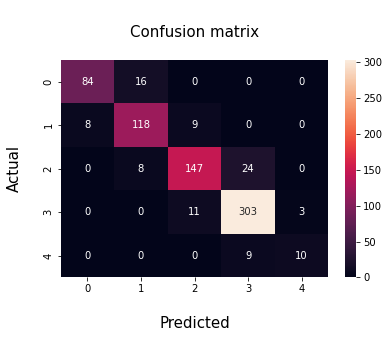

In [62]:
sns.heatmap(confusion_matrix(y_test,y_sc,),annot=True,fmt='d')
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual\n',fontsize=15)
plt.title('\nConfusion matrix\n',fontsize=15)

In [63]:
print('\nClassification report:')
print(classification_report(y_test,y_sc))


Classification report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       100
           1       0.83      0.87      0.85       135
           2       0.88      0.82      0.85       179
           3       0.90      0.96      0.93       317
           4       0.77      0.53      0.62        19

    accuracy                           0.88       750
   macro avg       0.86      0.80      0.83       750
weighted avg       0.88      0.88      0.88       750



In [64]:
imp_sc=permutation_importance(sc,x_test,y_sc)
imp_sc=pd.DataFrame({'Feature':x_train.columns,'Importance':imp_sc.importances_mean})
display(imp_sc.sort_values(by='Importance',ascending=False)[:3])

,Feature,Importance
1,Trooms,0.351467
2,Nbedrooms,0.186667
0,Area(total),0.128533


### Summary report of Stacking:
**Training accuracy:** 1\
**Testing accuracy:** 0.885

**Top 3 influential features:**\
    1.Trooms\
    2.Nbedrooms\
    3.Area(total)

# Conclusion

In [67]:
print('Training accuracies:')
print('-'*50)
print('KNeighborsClassifier'.ljust(25),round(knn.score(x_train,y_train),3))
print('GaussianNB'.ljust(25),round(nb.score(x_train,y_train),3))
print('DecisionTreeClassifier'.ljust(25),round(grid_search_dtc.best_estimator_.score(x_train,y_train),3))
print('RandomForestClassifier'.ljust(25),round(grid_search_rfc.best_estimator_.score(x_train,y_train),3))
print('AdaBoostClassifier'.ljust(25),round(ab.score(x_train,y_train),5))
print('StackingClassifier'.ljust(25),round(sc.score(x_train,y_train),5))

Training accuracies:
--------------------------------------------------
KNeighborsClassifier      0.906
GaussianNB                0.808
DecisionTreeClassifier    0.94
RandomForestClassifier    0.987
AdaBoostClassifier        0.99956
StackingClassifier        1.0


In [66]:
print('Testing accuracies:')
print('-'*50)
print('KNeighborsClassifier'.ljust(25),round(accuracy_score(y_test,y_knn),3))
print('GaussianNB'.ljust(25),round(accuracy_score(y_test,y_nb),3))
print('DecisionTreeClassifier'.ljust(25),round(accuracy_score(y_test,y_dtc),3))
print('RandomForestClassifier'.ljust(25),round(accuracy_score(y_test,y_rfc),3))
print('AdaBoostClassifier'.ljust(25),round(accuracy_score(y_test,y_ab),3))
print('StackingClassifier'.ljust(25),round(accuracy_score(y_test,y_sc),3))

Testing accuracies:
--------------------------------------------------
KNeighborsClassifier      0.881
GaussianNB                0.789
DecisionTreeClassifier    0.825
RandomForestClassifier    0.856
AdaBoostClassifier        0.857
StackingClassifier        0.883


**KNeighboursClassifier** shows the best result\
**Trooms > Nbedrooms,Nbwashrooms,Area(total)** are the top influential features observed from the modelling